In [103]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r


In [120]:
from PIL import Image
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt

img_path = './downloads'


def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    r = list_files(img_path)
    for img in r:
        if "DS_Store" not in img:
            try:
                data = np.array(Image.open(img))
                heights.append(data.shape[0])
                widths.append(data.shape[1])
                img_count += 1
            except (IOError, SyntaxError) as e:
                print('Bad file:', img) # print out the names of corrupt files
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print('\n')
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

Bad file: ./downloads/test/chinese_child/18. Gemini-s-Store-Summer-Child-Cheongsam-Tang-Suit-Female-Child-Flower-Dress-Fluid-Chinese-Style-Baby.jpg
Bad file: ./downloads/test/chinese_child/24. 2018-New-Fashionista-Child-Chiffon-Princess-Dress-Pastoral-Style-Chinese-Children-Cute-Girl-Sweet-Fluffy-Dress.jpg
Bad file: ./downloads/test/chinese_child/46. Russia-Hot-sale-Chinese-Kid-Child-Girl-Flower-Cheongsam-Dress-girls-Qipao-Faux-Silk-Clothes-free.jpg
Bad file: ./downloads/test/ghanaian_child/14. 3o3bpd1avp7d2tgif8.jpg
Bad file: ./downloads/train/chinese_people/80. Mnotht-78029-1-6-Chinese-People-s-Liberation-Army-Honor-Guard-Navy-Air-Force-Toys-Model.jpg
Bad file: ./downloads/train/ghanaian_people/13. vllkyt4ee5p0c1fh1.jpg
Bad file: ./downloads/train/ghanaian_people/19. ?media_id=579246245589543.jpg
Bad file: ./downloads/train/ghanaian_people/38. ?media_id=325271464196477.jpg
Bad file: ./downloads/train/ghanaian_people/56. ?media_id=1326593757419760.jpg
Bad file: ./downloads/train/ghana

In [121]:
def label_img(directory):
    if directory == 'chinese_people': return np.array([1, 0])
    elif directory == 'ghanaian_people' : return np.array([0, 1])


In [122]:
from pathlib import Path

IMG_SIZE = 300

DIR = "./"

def load_training_data():
    train_data = []
    r = list_files(img_path)
    for img in r:
        try :
            parent = Path(img).parent
            label = label_img(parent)
            if "DS_Store" not in img:
                img_data = Image.open(img)
                img_data = img_data.convert('L')
                img_data = img_data.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
                train_data.append([np.array(img_data), label])
        except (IOError, SyntaxError) as e:
                print('Bad file:', img) # print out the names of corrupt files
            
    shuffle(train_data)
    return train_data

Bad file: ./downloads/test/chinese_child/18. Gemini-s-Store-Summer-Child-Cheongsam-Tang-Suit-Female-Child-Flower-Dress-Fluid-Chinese-Style-Baby.jpg
Bad file: ./downloads/test/chinese_child/24. 2018-New-Fashionista-Child-Chiffon-Princess-Dress-Pastoral-Style-Chinese-Children-Cute-Girl-Sweet-Fluffy-Dress.jpg
Bad file: ./downloads/test/chinese_child/46. Russia-Hot-sale-Chinese-Kid-Child-Girl-Flower-Cheongsam-Dress-girls-Qipao-Faux-Silk-Clothes-free.jpg
Bad file: ./downloads/test/ghanaian_child/14. 3o3bpd1avp7d2tgif8.jpg
Bad file: ./downloads/train/chinese_people/80. Mnotht-78029-1-6-Chinese-People-s-Liberation-Army-Honor-Guard-Navy-Air-Force-Toys-Model.jpg
Bad file: ./downloads/train/ghanaian_people/13. vllkyt4ee5p0c1fh1.jpg
Bad file: ./downloads/train/ghanaian_people/19. ?media_id=579246245589543.jpg
Bad file: ./downloads/train/ghanaian_people/38. ?media_id=325271464196477.jpg
Bad file: ./downloads/train/ghanaian_people/56. ?media_id=1326593757419760.jpg
Bad file: ./downloads/train/ghana

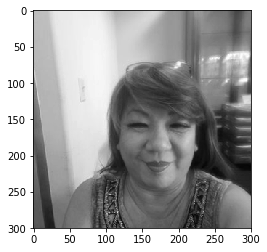

In [123]:
train_data = load_training_data()
plt.imshow(train_data[13][0], cmap = 'gist_gray')

In [124]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [119]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

ModuleNotFoundError: No module named 'keras'

In [118]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

ModuleNotFoundError: No module named 'keras'

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)

In [9]:
TEST_DIR = 'downloads/test'

def load_test_data():
    test_data = []
    for directory in os.listdir(TEST_DIR):
        for img in directory:
            label = label_img(img)
            path = os.path.join(TEST_DIR, img)
            if "DS_Store" not in path:
                img = Image.open(path)
                img = img.convert('L')
                img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
                test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


In [ ]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)